In [1]:
from manim import *
from classes.electrodynamics_classes import *
import jupyter_capture_output

video_scene = " -v WARNING --disable_caching disp_curr_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s disp_curr_Scene"

Manim Community v0.18.0.post0

Jupyter Capture Output v0.0.11


In [105]:
# class for the voltage symbol
class Voltage(Mobject):
    def __init__(self, center = np.array([0, 0, 0]), radius = 0.5, **kwargs):
        super().__init__(**kwargs)
        self.v_circle_center = center
        self.v_circle_radius = radius
        self.line_factor = 2
        voltage_circle = Circle(radius = self.v_circle_radius, color = main_color, fill_opacity = 1, fill_color = inverted_main_color).move_to(self.v_circle_center) 
        voltage_line = Line(start = [-self.line_factor * self.v_circle_radius, 0, 0], end = [self.line_factor * self.v_circle_radius, 0, 0], color = main_color).move_to(self.v_circle_center) .rotate(PI /4)
        voltage_descriptor = Text(r"U", color = main_color, font_size = 32).next_to(voltage_circle, DOWN)
        voltage_group = VGroup(voltage_circle, voltage_line, voltage_descriptor)
        self.add(voltage_group)


# class for the main graphic
class DisplacementCurrent(Mobject):
    def __init__(self, center = np.array([0, 0, 0]), height = 3, width = 6, **kwargs):
        super().__init__(**kwargs)
        self.center = center
        self.circuit_height = height
        self.circuit_width = width
        self.voltage_position = center + height/2*DOWN
        self.plate_space = width/3

        # electric circuit
        bottom_line = Line(start = self.center + self.circuit_height/2*DOWN + self.circuit_width/2*LEFT, end = self.center + self.circuit_height/2*DOWN + self.circuit_width/2*RIGHT, color = main_color)
        left_line = Line(start = self.center + self.circuit_height/2*DOWN + self.circuit_width/2*LEFT, end = self.center + self.circuit_height/2*UP + self.circuit_width/2*LEFT, color = main_color)
        right_line = Line(start = self.center + self.circuit_height/2*DOWN + self.circuit_width/2*RIGHT, end = self.center + self.circuit_height/2*UP + self.circuit_width/2*RIGHT, color = main_color)
        up_line_left = Line(start = self.center + self.circuit_height/2*UP + self.circuit_width/2*LEFT, end = self.center + height/2*UP + self.plate_space/2*LEFT, color = main_color)
        up_line_right = Line(start = self.center + self.circuit_height/2*UP + self.circuit_width/2*RIGHT, end = self.center + height/2*UP + self.plate_space/2*RIGHT, color = main_color)
        self.add(bottom_line, left_line, right_line)
        left_plate = Ellipse(height = self.circuit_height/3, width = self.circuit_width/15, color = main_color, fill_color = inverted_main_color, fill_opacity = 1).move_to(center + height/2*UP + self.plate_space/2*LEFT)
        right_plate = Ellipse(height = self.circuit_height/3, width = self.circuit_width/15, color = main_color, fill_color = inverted_main_color, fill_opacity = 1).move_to(center + height/2*UP + self.plate_space/2*RIGHT)
        voltage = Voltage(center = self.voltage_position, radius = 0.3)
        self.add(voltage, up_line_left, left_plate, right_plate, up_line_right)


    # get current descriptors
    def get_current(self):
        left_current = Line(start = self.center + self.circuit_height/6*DOWN + self.circuit_width/1.65*LEFT, end = self.center + self.circuit_height/6*UP + self.circuit_width/1.65*LEFT, color = red_color).add_tip()
        right_current = Line(start = self.center + self.circuit_height/6*UP + self.circuit_width/1.65*RIGHT, end = self.center + self.circuit_height/6*DOWN + self.circuit_width/1.65*RIGHT, color = red_color).add_tip()
        left_current_descriptor = Tex(r"$\Vec{j}$", color = red_color, font_size = 32).next_to(left_current, 0.75*LEFT)
        right_current_descriptor = Tex(r"$\Vec{j}$", color = red_color, font_size = 32).next_to(right_current, 0.75*RIGHT)
        return VGroup(left_current, right_current, left_current_descriptor, right_current_descriptor)
    

    # get magnetic field from current
    def get_magnetic(self):
        left_magnetic = Arc(radius = 0.125, start_angle = PI/4, angle = -3/2*PI, color = blue_color).move_to(self.center + self.circuit_width/2*LEFT).add_tip(tip_width = 0.2, tip_length = 0.2)
        return VGroup(left_magnetic)



Output saved by creating file at animations/MX_4_Displacement_Current/Displacement_Current.mp4.


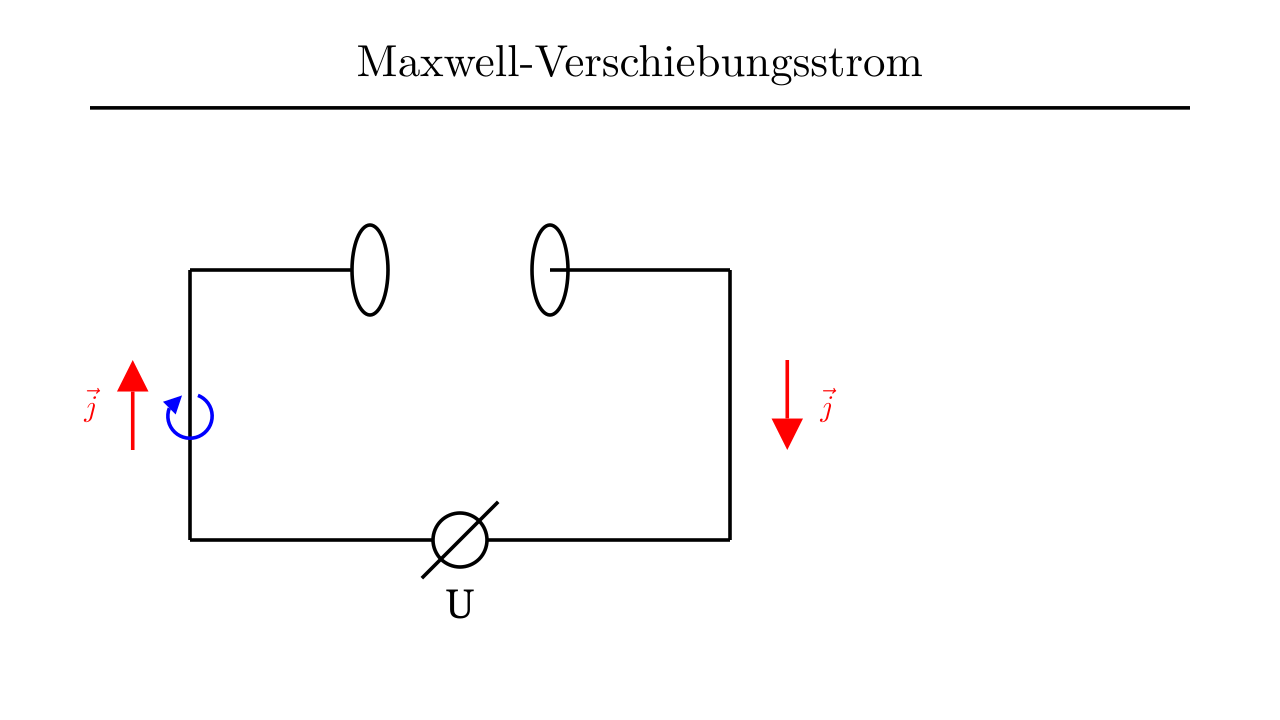

In [106]:
%%capture_video --path "animations/MX_4_Displacement_Current/Displacement_Current.mp4"
%%manim -qm --fps 60 $video_scene


class disp_curr_Scene(ThreeDScene):
    def construct(self):
        self.camera.background_color = inverted_main_color

        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # headline
        headline = Title(r"Maxwell-Verschiebungsstrom", font_size = 48, color = main_color).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
        headline.underline.set_color(main_color)
        self.add(headline)

        circuit = DisplacementCurrent(center = np.array([-2, -0.5, 0]))
        self.add(circuit)

        current = circuit.get_current()
        self.add(current)

        magnetic = circuit.get_magnetic()
        self.add(magnetic)

